In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
data = pd.read_csv("ortopedik_hastaların_biyomekanik_özellikleri_20220209.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


No handles with labels found to put in legend.


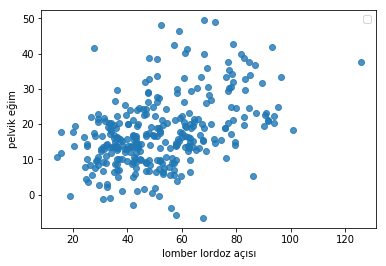

In [3]:
sns.regplot(data=data,x="lumbar_lordosis_angle", y="pelvic_tilt numeric",fit_reg=False)
plt.xlabel("lomber lordoz açısı")
plt.ylabel("pelvik eğim")
plt.legend()
plt.show()

In [4]:
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1


In [5]:
y = data["class"].values
x_data = data.drop(["class"],axis =1)

In [6]:
#normalizasyon
x= (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))

In [7]:
#eğiitm test olarak bölünmesi
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size =0.15 ,random_state=1)

K-En yakın komşu algoritmasının eğitimi ve testi

In [8]:

from sklearn.neighbors import KNeighborsClassifier
komsu_sayisi = 4
knn=KNeighborsClassifier(n_neighbors = komsu_sayisi)
knn.fit(x_train,y_train)

prediction = knn.predict(x_test)
print("{} En yakın komşu modeli testi doğruluk : {}".format(komsu_sayisi,knn.score(x_test,y_test)))


4 En yakın komşu modeli testi doğruluk : 0.6382978723404256


En iyi k değerinin bulunması 
Veri setim küçükse yapılabilir

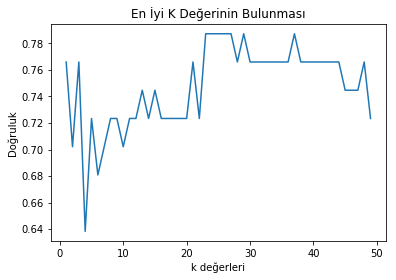

In [9]:
score_list =[]
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    

plt.plot(range(1,50),score_list)
plt.xlabel("k değerleri")
plt.ylabel("Doğruluk")
plt.title("En İyi K Değerinin Bulunması")
plt.show()

DESTEK VEKTÖR MAKİNESİ

In [10]:
from sklearn.svm import SVC
svm= SVC(random_state=1)
svm.fit(x_train,y_train)

print("Destek Vektör Makinesi Modeli Test Doğruluk  {}".format(svm.score(x_test,y_test)))

Destek Vektör Makinesi Modeli Test Doğruluk  0.6170212765957447


Karar Ağacı  

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

print("Karar Ağacı Modeli Test Doğruluk {}".format(dt.score(x_test,y_test)))

Karar Ağacı Modeli Test Doğruluk 0.8085106382978723


Rastgele Orman

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier(n_estimators = 100 ,random_state=1)#100 tane karar ağacı
rf.fit(x_train,y_train)

print("Rastgele Orman Modeli Test Doğruluk {}".format(rf.score(x_test,y_test)))

Rastgele Orman Modeli Test Doğruluk 0.8723404255319149


In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm= confusion_matrix(y_test,y_pred)
cm

array([[14,  3],
       [ 3, 27]], dtype=int64)

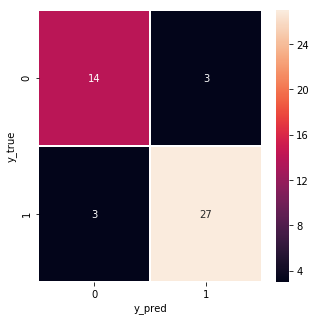

In [17]:
#sıcaklık haritası
f,ax= plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True , linewidths =0.5 , linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()